# The *t*-Statistic
## When the Sample Size is Small

Think back to the *Central Limit Theorem* (CLT) that we discussed previously. What was the one caveat to that theorem (I kind of gave it away in the title to this section)?

Right, the CLT only applies when the sample size $N$ is sufficiently large and by "sufficiently large", we mean approximately $N$ $\geq$ 30.

But, why is this a caveat of the CLT?

Recall, the equation for the $z$-statistic,

$$
\begin{align}
z &= \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{N}}}
\end{align}
$$

To use this equation, we need to know the population standard deviation, $\sigma$, i.e. the standard deviation from the underlying distribution from which the sample is drawn. But often, we don't know what the underlying distribution. If we have a large enough sample, the sample standard deviation $s$ is a good approximation of the true population $\sigma$.

However, if $N$ < 30, this is not the case, and the $z$-statistic does not apply!

In this case, one must use the **Student's $t$-statistic.** 

The $t$-statistic is analogous to the $z$-statistic, except that the probabilities are associated with the $t$-distribution rather than the standard normal distribution. The shape of the $t$-distribution depends on the [degrees of freedom](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics). 

In the simplest terms, the **degrees of freedom** ($\nu$) correspond to the sample size $N$. Given that we have used one degree of freedom to estimate the population mean using the sample mean, we are only left with $N$-1 degrees of freedom to estimate the population variance using the sample variance. For large sample sizes, the difference between $N$ and $N$-1 is very small and the CLT applies, but for small sample sizes, the degrees of freedom can substantially affect the shape of the $t$-distribution.

Let's compare the $z$- and $t$-distributions for different sample sizes.

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Click on the "Run Live Code" button at the top of the page and try running this code with different values for the degrees of freedom (dof). Try the following: dof = 50, 30, 20, 10, 5, 2

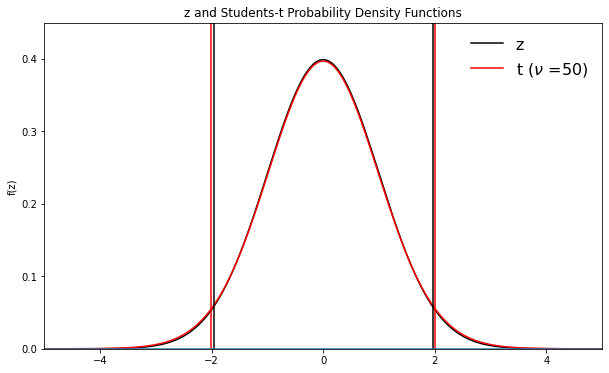

In [2]:
# Plot z and t distributions

dof = 50 #degrees of freedom (N-1)
x = np.arange(-6,6,.01)

# Get distributions of z and t
z = st.norm.pdf(x,0,1)
t = st.t.pdf(x,dof)

# Compute the 95% confidence intervals
z95_neg = st.norm.ppf(0.025)
t95_neg = st.t.ppf(0.025,dof)
z95_pos = st.norm.ppf(0.975)
t95_pos = st.t.ppf(0.975,dof)

# Plot z and t
plt.figure(figsize=(10,6))
plt.plot(x,z, color = 'k', label = 'z')
plt.plot(x,t,linestyle = '-', color = 'r', label = r"t ($\nu$ =" + str(dof) + ")")

# Plot 95% confidence intervals
plt.axvline(z95_neg,color='k')
plt.axvline(t95_neg,color='r')
plt.axvline(z95_pos,color='k')
plt.axvline(t95_pos,color='r')

#  Make the plot look nice!
plt.title('z and Students-t Probability Density Functions')
plt.ylabel('f(z)')
plt.legend(frameon = 0,fontsize = 16)
plt.xlim(-5,5)
plt.ylim(0,.45)
plt.yticks(np.arange(0,.5,.1))
plt.axhline(0)

What happens as you change the dof?

- smaller values of $N$ lead to longer tails for the $t$-distribution
- as $N$ increases, the $t$-distribution approaches the $z$-distribution

So, as $N$ get smaller then $t$-statistic gives more conservative probabilities (notice how the confidence intervals about the mean get larger as $N$ get smaller. In other words, we are less and less confident in our estimate of the true population mean).

## Definition of the *t*-Statistic

The $t$-statistic is defined as

$$
\begin{align}
t &= \frac{\overline{x} - \mu}{\frac{s}{\sqrt{N}}}
\end{align}
$$

where $s$ is the sample standard deviation.

Recall from the CLT example that when $N$ $\geq$ 30, the true standard deviation of the distribution of sample means is well-approximated by $\sigma/\sqrt{N}$, where $\sigma$ in the population standard deviation. This is the definition of the $z$-statistic. However, in the case of the $t$-statistic, we write $s$ since the true $\sigma$ is unknown.

Note the similarities between the $z$-statistic and the $t$-statistic. The main differences are the use of $s$ versus $\sigma$ to account for the loss of a degree of freedom.

As before, we can manipulate the above equation to compute the $t$-statistic for the difference of means. It is very similar to that for the $z$-statistic, but with slight modifications. Assume two samples $N_1$ and $N_2$ are drawn from an normal distributions whose standard deviations are similar ($s_1$ $\approx$ $s_2$).

$$
t = \frac{(\overline{x_1} - \overline{x_2}) - \Delta_{1,2}}{\hat{s}\sqrt{\frac{1}{N_1} + \frac{1}{N_2}}}
$$

where

$$
\hat{s} = \sqrt{\frac{(N_1-1)s_1^2 + (N_2-1)s_2^2}{N_1 + N_2 - 2}}
$$

is the pooled standard deviation, the square-root of the weighted average of the sample variances.

The degrees of freedom are $\nu = N_1 + N_2 - 2$ and $\Delta_{1,2}$ is the null hypothesized difference between the two means, which is typically zero in practice. 



### Confidence Intervals

Just as we did for the $z$-statistic, we can determine confidence intervals on the true population mean, $\mu$, using the $t$-statistic. Let's revisit our previous example but change the sample size:

```{admonition} Question #5
:class: tip
Say we have surface air temperatures for 10 winters with a mean of 10°C and a standard deviation of 5°C. What is the 95% confidence interval on the true population mean? You may assume that the temperatures are normally distributed.
```

In this question, we are told to estimate the 95% confidence intervals. This means we should consider the 95% confidence level, i.e. the 5% significance level.

To estimate the 95% confidence intervals on $\mu$, we can simply rearrange the equation for $z$ as follows,

$$
\begin{align}
t &= \frac{\overline{x} - \mu}{\frac{s}{\sqrt{N}}} \\
\mu & = \overline{x} - t\frac{s}{\sqrt{N}}
\end{align}
$$

Since we are interested in the 95% confidence intervals centred on $\mu$, and since the normal distribution is symmetric about the $\mu$, this can be rewritten as,

$$
\begin{align}
\mu & = \overline{x} \pm t_{\alpha/2}\frac{s}{\sqrt{N}}
\end{align}
$$

where $t_{\alpha/2}$ is the value for $t$ for a two-sided 95% confidence level (5% significance level). We can use python to find this value:

In [3]:
# Question #5
# find t values for a two-sided 95% confidence level
N = 10
dof = N - 1
tneg = st.t.ppf(0.025,dof) # negative side of distribution
tpos = st.t.ppf(0.975,dof) # positive side of distribution
print(round(tneg,2),round(tpos,2))

-2.26 2.26


Plugging this all in, we get

$$
\begin{align}
\mu & = 10 \pm 2.26\frac{5}{\sqrt{10}}\\
& = 10 \pm 3.57
\end{align}
$$

Thus, the 95% confidence intervals on the true population mean, $\mu$ are,

$$
6.43^{\circ}C \leq \mu \leq 13.57^{\circ}C
$$

So, we can see that when we have a smaller sample size, we become less confident in our estimate of the true population mean.

## *t*-Test: Key Assumption 

The *t*-test is ubiquitous in scientific literature and it often gets misused. One of the ways that it gets misused is that an important underlying assumption is often overlooked.

```{warning}
In order to use the $t$-statistic, the underlying distribution is assumed to be **normal**.
```

The moral of the story is: **always look at your data first!** Remember to:
- Plot your data
- Examine the skewness, kurtosis, etc.

If your data is not normally distributed, but your sample size is large ($N \geq$ 30), then the CLT applies and you can use a $z$-test. But, in practice, scientists tend to always use the $t$-test for large $N$ anyway, as the $t$- and $z$-distributions converge for large $N$.

## Comparison of the *z*- and *t*-Statistic

Let's take a look at an example and compare the results we get if we use the $z$- versus $t$-statistic.

```{admonition} Question #6
:class: tip
You have 5 years of monthly-mean temperature data derived from the MSU4 satellite (upper stratosphere). The mean temperature along 60°N during January is -60°C and the standard deviation is 8°C. What are the 95% confidence limits on the true population mean?
```

**The z-Statistic:**

The critical value $z_c$ = $\pm$ 1.96 for 95% confidence. Here, we must assume that the standard deviation provided represents the population standard deviation. Thus, the population mean $\mu$ is expected to lie within:

$$
\begin{align}
\mu &= -60 \pm 1.96\frac{8}{\sqrt{5}}\\
&= -60 \pm 7
\end{align}
$$

$$
-67.0^{\circ}C \leq \mu \leq -53^{\circ}C
$$

**The t-Statistic:**

Assuming that the data is normally distributed, the critical value $t_c$ = 2.78 for $\nu$ = 5 - 1 = 4. Thus, the population mean $\mu$ is expected to lie within:

$$
\begin{align}
\mu &= -60 \pm 2.78\frac{8}{\sqrt{5}}\\
&= -60 \pm 9.94
\end{align}
$$

$$
-69.94^{\circ}C \leq \mu \leq -50.06^{\circ}C
$$

We can see that we get a more conservative estimate of the confidence intervals using the $t$-statistic, which reasonably reflects the fact that we have a very small sample size.

## Hypothesis Testing and the *t*-Statistic

Everything that we previously discussed about hypothesis testing and the $z$-statistic applies to the $t$-statistic. With respect to terminology, we simply swap the critical $z$-value, $z_c$ for the critical $t$-value, $t_c$. Then, you can proceed with the Five Simple Steps, just as before.